In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

In [2]:
import hrv_analysis as hrv

100%|██████████| 2000/2000 [00:00<00:00, 1001505.25it/s]


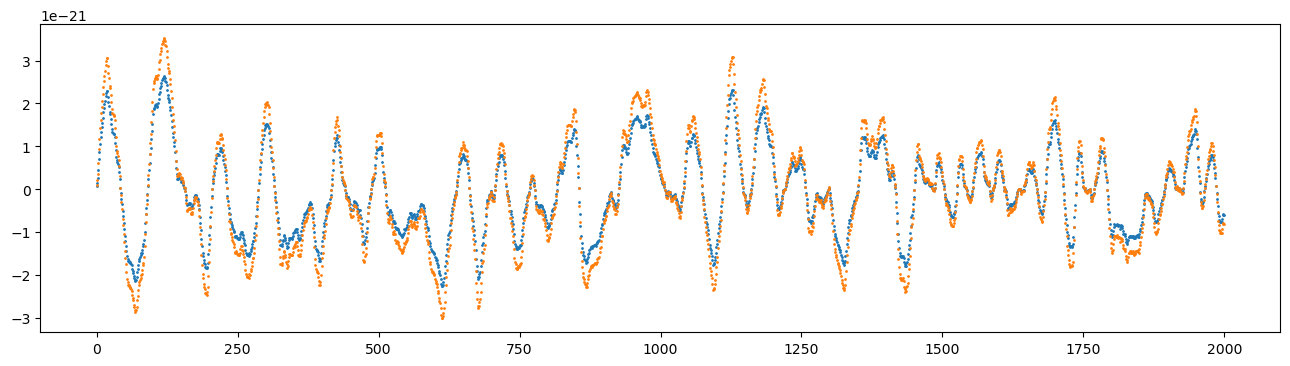

In [17]:



plt.figure(figsize = (16,4))
N = 2000
k = 1
d = 1
T = 300
stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, .1, verbose = True)
plt.scatter(range(len(stationary_model_data[0])), stationary_model_data[0], s = 1)
N = 2000
k = 1
d = 1
T = 400
stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, .1, verbose = True)
plt.scatter(range(len(stationary_model_data[0])), stationary_model_data[0], s = 1)
plt.show()

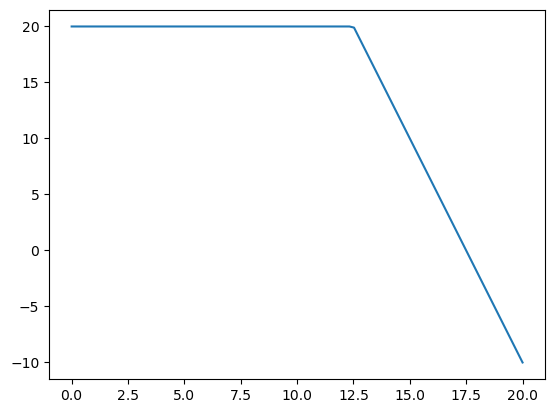

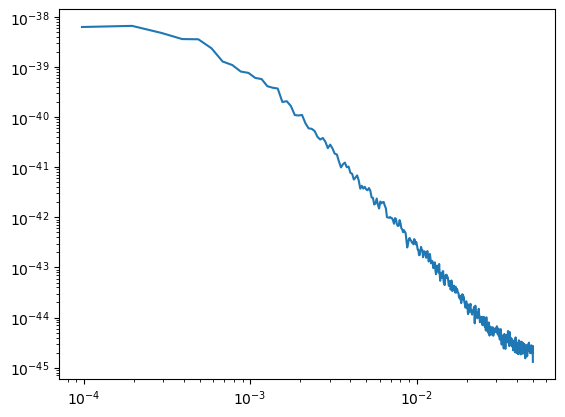

[  -3.40549007 -113.68371495  -88.35081128]
0.0005879654759215851


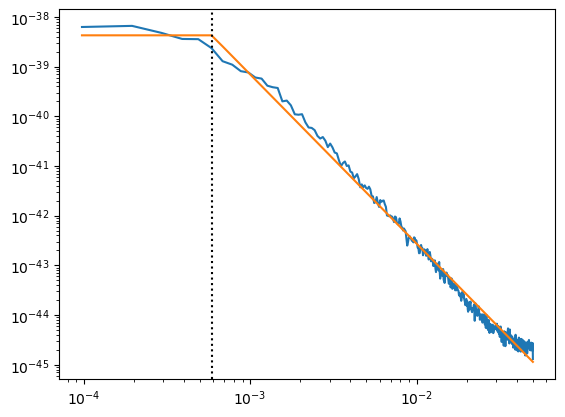

In [19]:
def cutoff_function(x, m, c, d):
    y = np.zeros_like(x)
    cutoff = (d - c) / m
    y[x >= cutoff] = m * x[x >= cutoff] + c
    y[x < cutoff] = d

    return y

xs = np.linspace(0, 20, 100)
m = -2
c = 50
d = 15
ys = cutoff_function(xs, -4, 70, 20)

plt.plot(xs, ys)
plt.show()

N = 20000
k = 0.2
d = 1
T = 300
stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, 0.1, verbose = False)
f, Pxx = signal.welch(stationary_model_data[0], fs=0.1, nperseg=1024)
plt.semilogy(f[1::], Pxx[1::])
plt.xscale("log")
plt.show()


from scipy.optimize import curve_fit

popt, pcov = curve_fit(cutoff_function, np.log(f[1::]), np.log(Pxx[1::]))

print(popt)
print(np.exp((popt[2] - popt[1]) / popt[0]))

plt.semilogy(f[1::], Pxx[1::])
plt.plot(np.exp(np.log(f[1::])), np.exp(cutoff_function(np.log(f[1::]), *popt)))
plt.axvline(np.exp((popt[2] - popt[1]) / popt[0]), ls = ":", c = "black")
plt.xscale("log")
plt.show()

In [20]:
def cutoff_function(x, m, c, d):
    y = np.zeros_like(x)
    cutoff = (d - c) / m
    y[x >= cutoff] = m * x[x >= cutoff] + c
    y[x < cutoff] = d

    return y

from scipy.optimize import curve_fit


N = 2000
d = 1
k = 0.5
T = 300
dt = 1
ks = []
ds = []
locs = []

d_values = np.linspace(0.01, 1, 50)
k_values = np.linspace(0.01, 0.77, 50)
popt = [-3.57515563, -114.68438607, -79.90968476]
for k in tqdm(d_values):
    for d in k_values:
        stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, dt, verbose = False)
        f, Pxx = signal.welch(stationary_model_data[0], fs=dt, nperseg=512)

        popt, pcov = curve_fit(cutoff_function, np.log(f[1::]), np.log(Pxx[1::]), p0 = popt)
        
        locs.append(np.exp((popt[2] - popt[1]) / popt[0]))
        ks.append(k)
        ds.append(d)


100%|██████████| 50/50 [00:09<00:00,  5.40it/s]


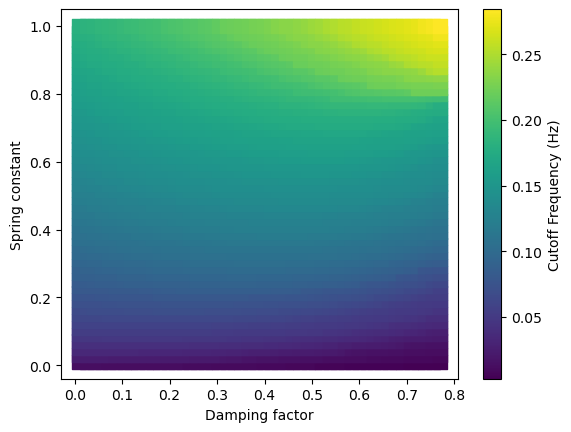

In [21]:
plt.scatter(ds, ks, c=locs, marker="s", s=100, cmap="viridis")
plt.xlabel("Damping factor")
plt.ylabel("Spring constant")
plt.colorbar(label = "Cutoff Frequency (Hz)")
plt.show()